## Loading data and training Models

In this jupyter notebook we are going to build our music genre classifiers. We are going to start by loading the features we have created before and then move to training and evaluation stage. During our process we will be evaluating and comparing their performance.

In the end I am going to show some deep learning based models that can perform the task analysing the music spectrogram directly and will propose a novel architecture that exceled on this task.

We are going to start by loading the `csv` file we saved using the previous notebook and visualising it using PCA just to give a small glimpse of what to expect from the classifiers. 

In [1]:
import os 
import pandas as pd
import numpy as np
import IPython.display as ipd

src_dir = os.getcwd()
features_dir = os.path.join(src_dir, 'dataset')

# Loading features and targets
data_df = pd.read_csv(os.path.join(features_dir, 'features.csv'), sep=',')

targets = data_df['Genre'].values                           ## Genre columns should be our targets
genres = sorted(list(np.unique(targets)))                   ## list with our 10 possible classes

features = data_df.drop(columns=['Name', 'Genre']).values   ## Dropping non-feature columns

#print("Features:")
#ipd.display(data_df.drop(columns=['Name', 'Genre']))
#print("Targets: ")
#ipd.display(data_df['Genre'])
ipd.display(data_df)

,Name,Genre,Centroid,Centroid Std,Rolloff 85%,Rolloff 85% Std,Rolloff 05%,Rolloff 05% Std,Zero-Crossing Rate,Zero-Crossing Rate (Std),...,MFCC-0,MFCC-0 Std,MFCC-1,MFCC-1 Std,MFCC-2,MFCC-2 Std,MFCC-3,MFCC-3 Std,MFCC-4,MFCC-4 Std
0,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1776.6237,377.17233,3738.6270,985.05164,88.648380,36.565563,0.084349,0.028513,...,-76.225550,47.812977,92.672900,14.645846,-0.869542,19.100159,26.020918,15.581945,5.278315,9.272931
1,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1785.8243,304.09494,3941.2302,822.78520,77.177414,36.592415,0.076144,0.023925,...,-91.701820,56.353924,87.307205,13.573576,8.877044,13.475040,31.626858,15.997764,7.072044,11.073791
2,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1641.8365,312.72394,3501.3591,862.11980,83.768190,31.730270,0.070274,0.016688,...,-63.532482,49.678787,101.299100,16.561068,2.802329,13.072867,20.934095,11.660361,0.627935,10.978201
3,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1974.1486,453.60916,4329.5320,1072.72660,87.239660,38.382683,0.093613,0.035050,...,-62.029247,52.925180,83.612180,18.532612,7.062488,15.529668,25.633170,12.685728,2.365620,10.459905
4,/mnt/e/carlos/code/epidemic-sound/genre-classi...,blues,1762.8859,341.77304,3810.7732,921.77220,96.647860,42.882904,0.074839,0.020703,...,-65.729360,46.212124,93.085550,14.109302,2.104553,16.896526,22.881002,14.509435,2.742398,11.131560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,/mnt/e/carlos/code/epidemic-sound/genre-classi...,rock,1734.8616,962.52716,3273.8518,1965.47470,84.070050,12.074379,0.090955,0.072451,...,-159.247790,151.365970,79.595116,49.224750,10.982214,18.773592,44.594130,9.170195,15.003209,10.369448
5996,/mnt/e/carlos/code/epidemic-sound/genre-classi...,rock,1501.9634,444.59665,3271.0847,909.91370,78.334570,18.395823,0.055256,0.027510,...,-151.975890,32.515625,99.937610,24.508549,10.552804,11.402127,37.841970,12.580439,1.625850,8.125340
5997,/mnt/e/carlos/code/epidemic-sound/genre-classi...,rock,1685.1466,540.82480,3410.0947,1154.81510,76.523370,20.109201,0.081237,0.030837,...,-122.105470,41.616535,94.759720,28.129717,-8.664053,14.039194,30.606050,12.840487,5.672390,8.936540
5998,/mnt/e/carlos/code/epidemic-sound/genre-classi...,rock,1643.3151,797.69214,3091.2725,1585.78760,86.132810,17.007574,0.092315,0.059356,...,-151.346660,135.149190,86.941770,42.230810,-0.679447,21.982302,43.764786,12.837153,11.050824,12.569325


## PCA and Visualisation of Data

Briefly speaking, Principal Component Analysis, or PCA, is a statistical technique to project high dimensional data to a lower dimension by selecting linear combination of features that capture maximum information about the dataset. The dimentionality reduction is done by projecting the old variable into a new set of uncorrelated variables called principal component (PC) while retaining the most possible variation within the feature space

In our genre classification project, we will be working with only 20 features, which is a fairly low number of features for current ML classifiers. But sometimes, huge number of features might be important for a task and PCA can be used to reduce the dimensionality of our data and facilitate training. 

Let's make a PCA to reduce our feature space to 5-D and see how much information is related to each initial feature. 

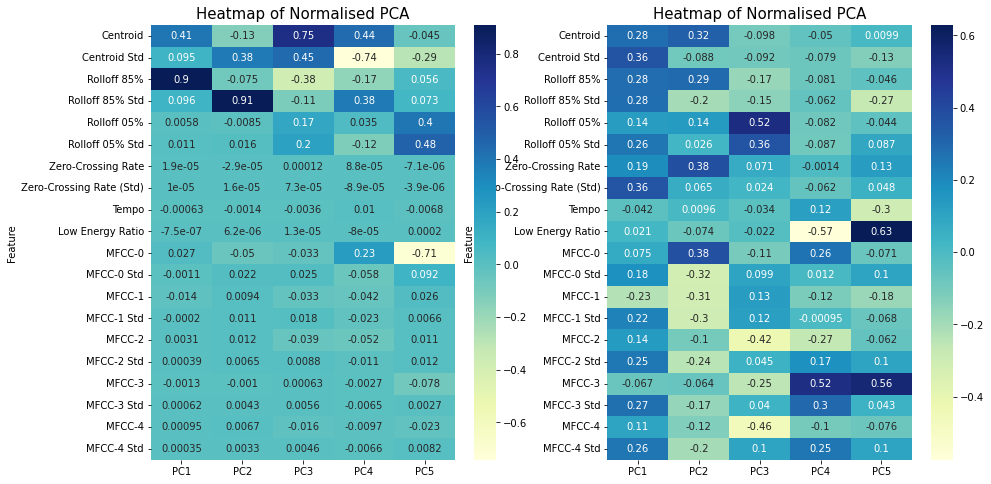

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from seaborn import heatmap

n_components = 5
names = data_df.drop(columns=['Name', 'Genre']).columns.values.tolist()
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,8))

## PCA without normalising features
pca_ = PCA(n_components=n_components).fit(features)
pc_list = ["PC"+str(i) for i in list(range(1, pca_.n_features_ + 1))]
comp_df = pd.DataFrame.from_dict(dict(zip(pc_list, pca_.components_)))
comp_df['Feature'] = names
comp_df = comp_df.set_index('Feature')

heatmap(comp_df, annot=True, cmap='YlGnBu', ax=ax1)
ax1.set_title('Heatmap of Normalised PCA', fontsize=15)

## PCA normalising features
scaler_ = StandardScaler()
scaled_features = scaler_.fit_transform(features)
pca_ = PCA(n_components=n_components).fit(scaled_features)
pc_list = ["PC"+str(i) for i in list(range(1, pca_.n_features_ + 1))]
comp_df = pd.DataFrame.from_dict(dict(zip(pc_list, pca_.components_)))
comp_df['Feature'] = names
comp_df = comp_df.set_index('Feature')

heatmap(comp_df, annot=True, cmap='YlGnBu', ax=ax2)
ax2.set_title('Heatmap of Normalised PCA', fontsize=15)
plt.show()

On the left you can see the PCA applied on the unormalised features and on the right the PCA applied after normalising each feature to 0 mean and 1 variance. Observe how PCA is largely affected by different scales of our features. 

When using the unormalised dataset, only the first 4 features already give us information for computing the principal components. However, by just normalising our dataset to the same scale, we can project our data to a lower dimensional space taking into account a lot of information about the other features.

Other than bringing more information from features to the PCA decomposition, it is also good to normalise the features because usually it facilitates learning, reduce training time and improve classification results. So, for now on we are just going to use the normalised set of features.

Another interesting thing we can do is to project our features to 2 dimensions by using PCA in order to visualise how the data we are working with looks like. By doing so, we can have insights on how hard some classes might be to classify.

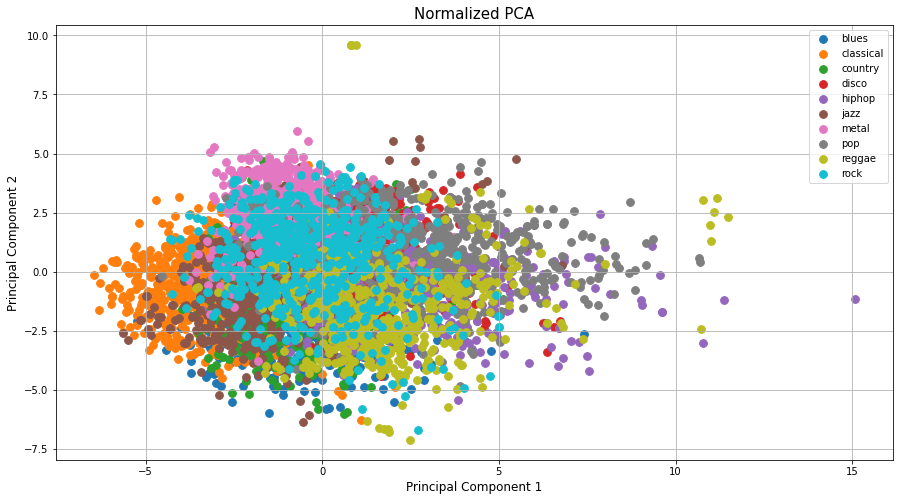

In [3]:
from sklearn.decomposition import PCA

n_components = 2

## PCA with normalised features
pca_ = PCA(n_components=2)
features_pca = pca_.fit_transform(scaled_features)

features_pca_df = pd.DataFrame(features_pca, columns = ['Principal Component 1', 'Principal Component 2'])
data_pca_df = pd.concat([features_pca_df, data_df['Genre']], axis = 1) ## adding labels for scatterplot

fig, ax = plt.subplots(figsize = (15,8))

ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('Normalized PCA', fontsize=15)

targets = data_df['Genre'].values                           ## Genre columns should be our targets
genres = sorted(list(np.unique(targets)))                   ## list with our 10 possible classes
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for g, color in zip(genres,colors):
    ax.scatter(data_pca_df.loc[data_pca_df['Genre']==g, 'Principal Component 1'], 
                data_pca_df.loc[data_pca_df['Genre']==g, 'Principal Component 2'],
                c=color, s=60)
    
ax.legend(genres)
ax.grid()

As you can see, even when using only 2 principal components of our initial 20 features, we can see there is some separation between the classes. As we might have expected, the rock genre formed a cloud in the middle of our 2D-plot, reflecting the higher variance of this particular genre if compared to other classes. If we exclude this genre from our scatterplot, look how  the different clips cluster together based on their genre. 

This tells us that we made a good choice of features to use on our classifiers.

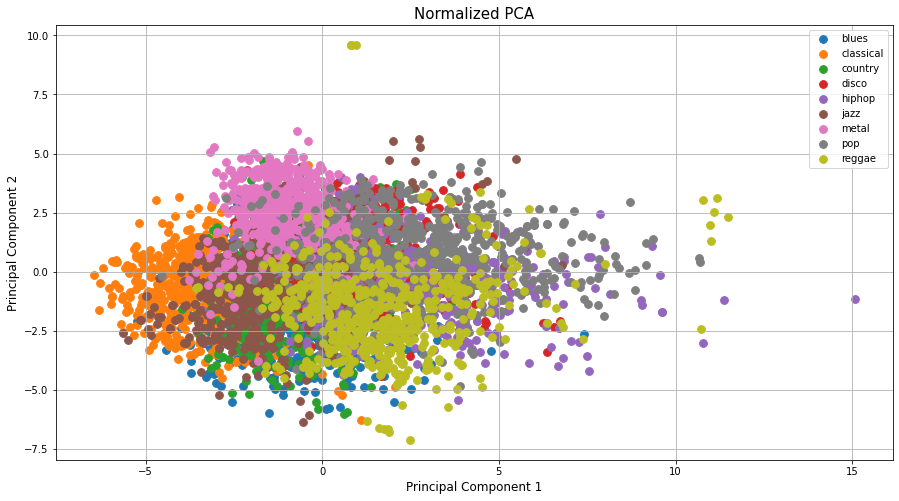

In [4]:
fig, ax = plt.subplots(figsize = (15,8))

ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('Normalized PCA', fontsize=15)

targets = data_df['Genre'].values                           ## Genre columns should be our targets
genres = sorted(list(np.unique(targets)))                   ## list with our 10 possible classes
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for g, color in zip(genres[:-1],colors[:-1]):
    ax.scatter(data_pca_df.loc[data_pca_df['Genre']==g, 'Principal Component 1'], 
                data_pca_df.loc[data_pca_df['Genre']==g, 'Principal Component 2'],
                c=color, s=60)
    
ax.legend(genres)
ax.grid()

## Training and Cross Validation:

Training the weights of a classsifier and testing it on the same data is a methodological mistake: we can end up with a model that would just memorised all the labels and repeat them- All the test data has already been seen during training. The model would fail to predict anything useful on yet-unseen data. This situation is called overfitting. 

To avoid overfitting, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set, i.e., splitting our features into a `X_train` and `X_test` sets and our targets as a `y_train` and `y_test` sets correspondingly. We are going to use 20% of data to test our classifiers and 80% to train, which is the usual ratio.

However, performing a single Train/Test split can induce bias in our predictions since the results will depend on the particular choice for the pair of (Train, Test) sets. Moreover, since we have to initially held out 20% of all available data to be used just for testing, the number of samples that will be effectivelly used to train our models are going to be even smaller. Since we already have a relativelly small dataset, our evaluation on the test set might not be so realistic.

A better approach is to perform **K-fold cross validation**, in which the full dataset is split into **K** smaller sets called *folds*, such that:

* The model is trained using **K-1** of the folds as training data;
* The resulting model is evaluated on the remaining fold;
* The final performance measure is the average of the metrics computed across each fold.  

This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary a test set), which is a major advantage in problems, specially when the number of labelled samples is very small.

Let's train a K-Nearest Neighbor in our dataset using a regular train/test split of 80/20 and then perform a 5-folds cross validation.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

n_neighbors=5
enc = LabelEncoder()
enc = enc.fit(genres)
targets_enc = enc.transform(targets) ## Converting string targets into numbers.

X_train, X_test, y_train, y_test = train_test_split(scaled_features, targets_enc, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=2022) # 80% training and 20% test

model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1_macro = f1_score(y_pred, y_test, average='macro')
f1_micro = f1_score(y_pred, y_test, average='micro')
acc = accuracy_score(y_pred, y_test)

print("F1-score (macro) = {:.4f}".format(f1_macro))
print("F1-score (micro) = {:.4f}".format(f1_micro))
print("Accuracy         = {:.4f}".format(acc))

F1-score (macro) = 0.7504
F1-score (micro) = 0.7542
Accuracy         = 0.7542


Our simple KNN classifier had an impressive 75% of performance in this particular train/test split. Let's get a more statistically significant measure by computing a 5-fold cross validation.

In [6]:
from sklearn.model_selection import KFold

n_folds = 5

f1_macro = []
f1_micro = []
acc = []

kf = KFold(n_splits=n_folds, random_state=2022, shuffle=True)

for train_idx, test_idx in kf.split(scaled_features):
    
    X_train, y_train, = scaled_features[train_idx], targets_enc[train_idx]
    X_test, y_test = scaled_features[test_idx], targets_enc[test_idx]

    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1_macro.append(f1_score(y_test, y_pred, average='macro'))
    f1_micro.append(f1_score(y_test, y_pred, average='micro'))
    acc.append(accuracy_score(y_test, y_pred))

print("F1-score (macro) in each fold was {}".format(f1_macro))
print("F1-score (micro) in each fold was {}".format(f1_micro))
print("Accuracy in each fold was         {}".format(acc))
print('\n')
print("Average F1-score (macro) of {:.4f} with stf dev of {:.4f}".format(np.mean(f1_macro), np.std(f1_macro)))
print("Average F1-score (micro) of {:.4f} with std dev of {:.4f}".format(np.mean(f1_micro), np.std(f1_micro)))
print("Accuracy of {:.4f} with std dev of {:.4f}".format(np.mean(acc), np.std(acc)))

F1-score (macro) in each fold was [0.7503513363998817, 0.7586274646282607, 0.7587008909748779, 0.7504965168930735, 0.7554276528024578]
F1-score (micro) in each fold was [0.7541666666666665, 0.7591666666666667, 0.76, 0.7508333333333334, 0.7566666666666667]
Accuracy in each fold was         [0.7541666666666667, 0.7591666666666667, 0.76, 0.7508333333333334, 0.7566666666666667]


Average F1-score (macro) of 0.7547 with stf dev of 0.0037
Average F1-score (micro) of 0.7562 with std dev of 0.0034
Accuracy of 0.7562 with std dev of 0.0034


Checking the results of the crosss validation, we can conlude, with a higher level of significancy, that our KNN classifier would be able to obtain around 75,6% accuracy if it was used to classify genres of new out-of-GTZAN audio samples. 

Of course that if we had evaluated using a larger test set, the performance would probably decrease, but, as a proof of concept, this simple KNN has turned out to be a quite good baseline to work with.

This result also shows that our choice of features were quite meaningfull for this particular classification task.

## Tweaking Hyperparameters

Another important topic I think it is important to discuss here is searching for the perfect hyperparameters. 

Machine learning models have hyperparameters that should be set beforehand. Ideally, our choices for hyperparameters should be tweaked for the particular task and data. In the case of our previous KNN classifier, a good example of a hyperparameter is the number of neighbors to be used in the classifier. 
>**Why should we use 5 neighbors? Maybe another value might give us better results...**

Indeed, this is a question that we can only answer if we effectivelly experiment multiple values for the hyperparameter and keep the best one. This is exactly what we will be doing next. 

Some models have a lot of hyperparameters that, ideally, should all be tweaked, but since we dont have much time and the idea of this project is just to give an overall overview, we will be performing a single-hyperparameter search for some traditional ML models to show how it is possible to increase their performance.

Furthermore, at the same time we perform a grid search for best hyperparameter, let's also check if we can use PCA to decrease the number of features and get better results by training classifiers in lower dimensions.  

For the sake of time, we are not going to perform K-fold validation of our models anymore. We will be using a single train/test split to make things a bit faster. However, in a real-world scenario, it would be recommended to perform the search for best hyperparameters and at the same time k-fold cross validating the performance.

In [7]:
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, accuracy_score

def tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, **kwargs):
    """This function receives a scikit-learn model class with corresponding hyperparameter
       name and performs a hyperparameter search based on a provided grid. It also tests
       the model using different numbers of PCA components

        Args:
            ModelType (scikit-learn model): Model to be trained
            PCA_range (iterable): Grid with number of PCA components to be searched
            param_name (str): Name of parameter passed to function sklearn.Modeltype(**kwargs[param_name])
            param_range (iterable): Grid with possible values of parameters to be searched
        Returns:
            (tuple of dict): [f1_score_macro, f1_score_micro, accuracy_score]. Scores for every possible combination 
                                                                               of PCA and Hyperparameter
        """ 
    global X_train
    global X_test
    global y_train
    global y_test

    ## Dictionaries to store best scores
    f1_scores_mac = {}
    f1_scores_mic = {}
    acc_scores = {} 

    for comp in tqdm(PCA_range, desc="Training models using PCA...", position=0):
        f1_scores_mac[comp] = []
        f1_scores_mic[comp] = []
        acc_scores[comp] = []
        if comp != X_train.shape[1]:
            pca_ = PCA(n_components=comp)
            X_train_pca = pca_.fit_transform(X_train)
            X_test_pca = pca_.transform(X_test)
        else:
            X_train_pca = X_train
            X_test_pca = X_test
            
        for param in tqdm(param_range, desc="Testing different values of hyperparameter {}...".format(param_name), position=0, leave=False):
            kwargs[param_name] = param
            
            # Create Classifier of ModelType with hyperparameter to tweak
            model = ModelType(**kwargs)

            #Train the model using the training set
            model.fit(X_train_pca, y_train)
            #Predict the response for test dataset
            y_pred = model.predict(X_test_pca)
            
            f1_macro = f1_score(y_test, y_pred, average='macro')
            f1_micro = f1_score(y_test, y_pred, average='micro')
            acc = accuracy_score(y_test, y_pred)

            f1_scores_mac[comp].append(f1_macro)
            f1_scores_mic[comp].append(f1_micro)
            acc_scores[comp].append(acc)

    return (f1_scores_mac, f1_scores_mic, acc_scores)

def createEvalDataframe(f1_scores_mac, f1_scores_mic, acc_scores, PCA_range, param_range):
    """Creates a dataframe using the scores computed by tuneModelAndPCA()
    Args:
        f1_scores_mac (dict)       : F1 score (macro) for every combination of number of PCA components and hyperparameter
        f1_scores_mic (dict)       : F1 score (macro) for every combination of number of PCA components and hyperparameter
        acc_scores (dict)          : Accuracy for every combination of number of PCA components and hyperparameter
        PCA_range (list,iterable)  : range of components for PCA analysis (1 to 20 in our case)
        param_range (list,iterable): hyper parameter grid we used

    Returns:
        [pd.dataframe]: A dataframe with scores in which the number of PCA components will be columns 
                        and choice of hyperparameter the rows
    """

    ind = pd.MultiIndex.from_product([param_range,['F1_macro', 'F1_micro', 'Accuracy']] , names=['Hyperparameter', "Scores"])

    scs = []
    for comp in PCA_range:
        x = list(zip(f1_scores_mac[comp], f1_scores_mic[comp], acc_scores[comp]))
        v = [s for sc in x for s in sc]
        scs.append(v)

    df = pd.DataFrame(data=np.array(scs).T, index=ind, columns=['PCA_{}'.format(str(comp)) for comp in PCA_range])
    
    df.head(30)
    return df

def getBestResults(df, param_name='HyperParameter', verbose=True):
    """
    Computes the best combination of number of PCA components and hyperparameter choice given on the dataframe
    
    Args:
        df (pd,dataFrame)           : A dataframe with scores in which the number of PCA components 
                                      will be columns and choice of hyperparameter the rows
        param_name (str)            : Name of hyperparameter tested
        verbose (bool, default:True): if True, print the best results 
    Returns:
        [dict]: dictionary with best scores for every metric
    """
    best_f1_mac = df.groupby(['Scores']).max().max(axis='columns')['F1_macro']
    best_f1_mic = df.groupby(['Scores']).max().max(axis='columns')['F1_micro']
    best_acc = df.groupby(['Scores']).max().max(axis='columns')['Accuracy']

    best_PCA_f1_mac = df.groupby(['Scores']).max().idxmax(axis='columns')['F1_macro']
    best_PCA_f1_mic = df.groupby(['Scores']).max().idxmax(axis='columns')['F1_micro']
    best_PCA_acc = df.groupby(['Scores']).max().idxmax(axis='columns')['Accuracy']

    best_param_f1_mac = df.groupby(['Scores'])[best_PCA_f1_mac].idxmax()['F1_macro'][0]
    best_param_f1_mic = df.groupby(['Scores'])[best_PCA_f1_mic].idxmax()['F1_micro'][0]
    best_param_acc = df.groupby(['Scores'])[best_PCA_acc].idxmax()['Accuracy'][0]
    
    best_scores = {
        'f1_mac': (best_f1_mac, int(best_PCA_f1_mac.split('_')[1]), best_param_f1_mac),
        'f1_mic': (best_f1_mic, int(best_PCA_f1_mic.split('_')[1]), best_param_f1_mic),
        'acc': (best_acc, int(best_PCA_acc.split('_')[1]), best_param_acc)
    }

    if verbose:
        print('Best achievable F1-macro was {:.4f}. When using {} PCA components and \'{}\' = {}'.format(best_f1_mac, 
                                                                                                   best_PCA_f1_mac.split('_')[1], 
                                                                                                   param_name,
                                                                                                   best_param_f1_mac))
        print('Best achievable F1-micro was {:.4f}. When using {} PCA components and \'{}\' = {}'.format(best_f1_mic, 
                                                                                                   best_PCA_f1_mic.split('_')[1],
                                                                                                   param_name, 
                                                                                                   best_param_f1_mic))
        print('Best achievable accuracy was {:.4f}. When using {} PCA components and \'{}\' = {}'.format(best_acc, 
                                                                                                   best_PCA_acc.split('_')[1], 
                                                                                                   param_name,
                                                                                                   best_param_acc))
    return best_scores
        

We are going to teak hyperparameters by calling our function `tuneModelAndPCA`, which will tune a particular hyperparameter of a model and also evaluate the results varying the number of components of the PCA. 

Before starting, we should setup a single train/test split again and set the range to vary the number of PCA components, which we are going to experiment from 1 to 20 (original feature dimension size)

In [8]:
## Setting train/test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, targets_enc, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=2022) # 80% training and 20% test

## Setting range of Best PCA search
min_PCA = 1
max_PCA = features.shape[1]
PCA_range = range(min_PCA, max_PCA + 1)

### K-Nearest Neighbors (KNN)

The principle behind nearest neighbor classifier is to find a predefined number of training samples closest in distance to the new point, and predict as label for the input that same label that the majority of the neighbors belongs to. We have seen that we were able to get around 75.6% accuracy by checking the classes of the 5 nearest neighbors or our 20-D input. Right now we are going to test how many neighbors would be the perfect choice for our task.

We also are going to evaluate the model using lower number of principal components instead of the whole set of the features.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

ModelType = KNeighborsClassifier    # Setting name of sklearn model to use
param_name = 'n_neighbors'          # Number of model's hyperparameter to tweak
param_range = range(1, 100)         # Grid to search for best hyperparameter

print('Training KNNs and tweaking its PCA and number of neighbors')
scores_df_knn = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range),  
                                    PCA_range, 
                                    param_range)
knn_scores_knn = getBestResults(df=scores_df_knn, param_name=param_name, verbose=True)

Training KNNs and tweaking its PCA and number of neighbors


Training models using PCA...:   0%|          | 0/20 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter n_neighbors...:   0%|          | 0/99 [00:00<?, ?it/s]

Best achievable F1-macro was 0.8152. When using 20 PCA components and 'n_neighbors' = 1
Best achievable F1-micro was 0.8175. When using 20 PCA components and 'n_neighbors' = 1
Best achievable accuracy was 0.8175. When using 20 PCA components and 'n_neighbors' = 1


Wow! It looks like we got an impressive performance by just using a single neighbor! 

Since this result seems quite impressive, let's make a quick 5-fold cross validation to check if we can confirm this result with other splits.

In [10]:
n_folds = 5

f1_macro = []
f1_micro = []
acc = []

kf = KFold(n_splits=n_folds, random_state=2022, shuffle=True)

for train_idx, test_idx in kf.split(scaled_features):
    
    X_train, y_train, = scaled_features[train_idx], targets_enc[train_idx]
    X_test, y_test = scaled_features[test_idx], targets_enc[test_idx]

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1_macro.append(f1_score(y_test, y_pred, average='macro'))
    f1_micro.append(f1_score(y_test, y_pred, average='micro'))
    acc.append(accuracy_score(y_test, y_pred))

print("F1-score (macro) in each fold was {}".format(f1_macro))
print("F1-score (micro) in each fold was {}".format(f1_micro))
print("Accuracy in each fold was         {}".format(acc))
print('\n')
print("Average F1-score (macro) of {:.4f} with stf dev of {:.4f}".format(np.mean(f1_macro), np.std(f1_macro)))
print("Average F1-score (micro) of {:.4f} with std dev of {:.4f}".format(np.mean(f1_micro), np.std(f1_micro)))
print("Accuracy of {:.4f} with std dev of {:.4f}".format(np.mean(acc), np.std(acc)))

F1-score (macro) in each fold was [0.8159746109441025, 0.824703250455768, 0.8306066338472821, 0.7973100961908542, 0.8175339206154579]
F1-score (micro) in each fold was [0.8183333333333332, 0.825, 0.83, 0.7966666666666665, 0.8175]
Accuracy in each fold was         [0.8183333333333334, 0.825, 0.83, 0.7966666666666666, 0.8175]


Average F1-score (macro) of 0.8172 with stf dev of 0.0113
Average F1-score (micro) of 0.8175 with std dev of 0.0114
Accuracy of 0.8175 with std dev of 0.0114


Indeed, the kNN using just a single neighbor can obtain around 81.7% accuracy and F1-score. 

Now, let's go back and setup our original train/test split to test other models in a single fold again.

In [11]:
## Setting train/test split again
X_train, X_test, y_train, y_test = train_test_split(scaled_features, targets_enc, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=2022) # 80% training and 20% test

## Setting range of Best PCA search
min_PCA = 1
max_PCA = features.shape[1]
PCA_range = range(min_PCA, max_PCA+1)

### Decision Tree
Now we are going to train and evaluate a decision tree classifier. 

We are going to vary the value of `max_depth` of the tree and figure out which is the best one. We are also going to test if using PCA in our features we can obtain better results.

In [12]:
from sklearn import tree

ModelType = tree.DecisionTreeClassifier    # using decisioon tree
param_name = 'max_depth'                   # name of hyperparameter to test
param_range = range(1,100)                 # range of max tree depth to test

print("Training Decision Trees and tweaking its PCA and maximum tree depth")
scores_df_tree = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range),  
                                     PCA_range, 
                                     param_range)
scores_tree = getBestResults(df=scores_df_tree, param_name=param_name, verbose=True)

Training Decision Trees and tweaking its PCA and maximum tree depth


Training models using PCA...:   0%|          | 0/20 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Testing different values of hyperparameter max_depth...:   0%|          | 0/99 [00:00<?, ?it/s]

Best achievable F1-macro was 0.5733. When using 20 PCA components and 'max_depth' = 94
Best achievable F1-micro was 0.5750. When using 20 PCA components and 'max_depth' = 37
Best achievable accuracy was 0.5750. When using 20 PCA components and 'max_depth' = 37


The results of decision tree classifiers were quite modest at around 57.7% accuracy. Using the whole set of 20 features with max_depth of 91 trees seems to have obtained the best result.

### Support Vector Machine
We are going to train and evaluate an SVM classifier now. We are going to vary the value of its kernel type to figure out which one obtains the best performance. We are also going to test if by applying PCA in our features we can obtain better results.

In [13]:
from sklearn.svm import SVC

ModelType=SVC                                     # using support vector machine classifier
param_name= 'kernel'                              # we are going to tweak SVM kernel type
param_range=['poly', 'rbf', 'sigmoid']  # types of kernel to test

print('Training SVM Classifier and tweaking its PCA and kernel type')
scores_df_svc = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range),  
                                    PCA_range, 
                                    param_range)
scores_svc = getBestResults(df=scores_df_svc, param_name=param_name, verbose=True)

Training SVM Classifier and tweaking its PCA and kernel type


Training models using PCA...:   0%|          | 0/20 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Testing different values of hyperparameter kernel...:   0%|          | 0/3 [00:00<?, ?it/s]

Best achievable F1-macro was 0.7093. When using 19 PCA components and 'kernel' = rbf
Best achievable F1-micro was 0.7150. When using 19 PCA components and 'kernel' = rbf
Best achievable accuracy was 0.7150. When using 19 PCA components and 'kernel' = rbf


The SVM using an `rbf` kernel obtained the best results. And instead of working with our orinial 20 features, it seems that working with 19 principal componets is preferable in this case. In summary, the SVM classifier managed to get around 71.5% accuracy

### Linear Classifiers

Let's now train and evaluate Linear classifiers such as linear SVM and logistic regressor using stocastic gradient descent training (SGD). We are going to use the function `sklearn.linear_model.SGDClassifier`, which implements regularised linear models. By changing the parameter `loss` we can choose the loss function and consequently the type of model that is trained.

According to the documentation: 
>The `'hinge'` loss gives a linear SVM, choosing `'log'` loss gives us a logistic regression, a probabilistic classifier. `'modified_huber'` is another smooth loss that brings tolerance to outliers as well as probability estimates. `'squared_hinge' ` is like hinge but is quadratically penalised. 

We are going to test multiple values for the loss and check which type of classifier gets better result classifying the genres. Once again, we will be performing PCA in our features to verify if we can compress the features while increasing the performance.

In [14]:
from sklearn.linear_model import SGDClassifier

ModelType=SGDClassifier                      # Linear SVM with gradient descent
param_name= 'loss'                          # we are going to tweak its l2 regularization factor
param_range=['hinge', 'log', 'modified_huber', 'squared_hinge'] 

print('Training a linear classifiers using gradient descent and tweaking its PCA and regularization factor')
scores_df_sgd = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, random_state=2022, max_iter=2500),  
                                     PCA_range, 
                                     param_range)
scores_sgd = getBestResults(df=scores_df_sgd, param_name=param_name, verbose=True)

Training a linear classifiers using gradient descent and tweaking its PCA and regularization factor


Training models using PCA...:   0%|          | 0/20 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Testing different values of hyperparameter loss...:   0%|          | 0/4 [00:00<?, ?it/s]

Best achievable F1-macro was 0.5704. When using 20 PCA components and 'loss' = log
Best achievable F1-micro was 0.5808. When using 20 PCA components and 'loss' = log
Best achievable accuracy was 0.5808. When using 20 PCA components and 'loss' = log


/home/momo/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


You can see that a logistic regressor was the best linear classifier. It obtained 58.1% of accuracy.

### Naive Bayes Classifier
Naive Bayes classifier is a supervised classifier based on applying Bayes theorem with the “naive” assumption of conditional independence between every pair of features, given the value of the class variable. It is a "fully probabilitic classifier" that can be "trained" very quickly. 

Naive Bayes classifiers can be extremely fast compared to more sophisticated methods, but due to their strict assumptions, they have some limitations.

We are going to experiment how a simple probabilistic classifier that assumes each feature to be normally (Gaussian) distributed can perform on our task. We are also going to see if the application of PCA can bring benefits in this case. 

In [15]:
from sklearn.naive_bayes import GaussianNB

ModelType=GaussianNB
param_name= 'priors'
param_range=[None]

print('Training a Naive Bayes and tweaking its PCA')
scores_df_naive = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range),  
                                      PCA_range, 
                                      param_range)
scores_naive = getBestResults(df=scores_df_naive, param_name=param_name, verbose=True)

Training a Naive Bayes and tweaking its PCA


Training models using PCA...:   0%|          | 0/20 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Testing different values of hyperparameter priors...:   0%|          | 0/1 [00:00<?, ?it/s]

Best achievable F1-macro was 0.5417. When using 19 PCA components and 'priors' = nan
Best achievable F1-micro was 0.5483. When using 19 PCA components and 'priors' = nan
Best achievable accuracy was 0.5483. When using 19 PCA components and 'priors' = nan


The Naive bayes performance was better when using 19 principal components instead of the whole set of 20 features. However, its performance was only around 54.8%.

### Random Forest
I think it is also important to test an ensemble classifier. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalisability/robustness over a single estimator. 

The **Random Forest** is an ensemble classifier that consists of a number of decision trees that are applied on various sub-samples of the dataset. The trees' predictions are averaged in order to improve the accuracy and control overfitting.

The `sklearn.ensemble.RandomForestClassifier` can be used to train a random forest and by varying its `n_estimators` parameter we can vary the number of decision trees used in the forest.

In [16]:
## Ensemble method
from sklearn.ensemble import RandomForestClassifier

ModelType = RandomForestClassifier
param_name = 'n_estimators'
param_range = np.linspace(10,510,25, dtype=int)

print('Training a Random Forest Classifier and tweaking its PCA and number of trees in the forest')
scores_df_forest = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range),  
                                     PCA_range, 
                                     param_range)
scores_forest = getBestResults(df=scores_df_forest, param_name=param_name, verbose=True)

Training a Random Forest Classifier and tweaking its PCA and number of trees in the forest


Training models using PCA...:   0%|          | 0/20 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Testing different values of hyperparameter n_estimators...:   0%|          | 0/25 [00:00<?, ?it/s]

Best achievable F1-macro was 0.7645. When using 20 PCA components and 'n_estimators' = 447
Best achievable F1-micro was 0.7692. When using 20 PCA components and 'n_estimators' = 447
Best achievable accuracy was 0.7692. When using 20 PCA components and 'n_estimators' = 447


Compared to a single decision tree, the averaging of multiple trees (random forest) obtained much better results. This shows us how important it is to create ensemble methods by combining multiple classifiers. The accuracy of a single decision tree classifier, which was around 57.7%, goes to 76.9% when we use a random forest with 280 estimators.

### Multi-layer Perceptron

Multi-layer Perceptron (MLP), also known as a neural network of fully connected layers, is the classifier we are going to test next. 

We are going to vary the number of hidden layers as well as the number of neurons according to the following grid `[(128,), (256,), (128,32), (64,16), (32,32,16)]`. In each tuple, the first number represents the number of neurons on first hidden layer, the second number represents the number of neurons on the second hidden layer and so on.

Once more we are also going to experiment with PCA on our features to verify if we can get better results.

In [17]:
from sklearn.neural_network import MLPClassifier
ModelType = MLPClassifier
param_name= 'hidden_layer_sizes'
param_range=[(128,), (256,), (128,32), (64,16), (32,32,16)] 

print('Training and tweaking a MLP (fully connected net) Classifer and tweaking is PCA and number of neurons')
scores_df_mlp = createEvalDataframe(*tuneModelAndPCA(ModelType, PCA_range, param_name, param_range, max_iter=1500),  
                                    PCA_range, 
                                    param_range)
scores_mlp = getBestResults(df=scores_df_mlp, param_name=param_name, verbose=True)

Training and tweaking a MLP (fully connected net) Classifer and tweaking is PCA and number of neurons


Training models using PCA...:   0%|          | 0/20 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/momo/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/momo/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/momo/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/momo/miniconda3/envs/my_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Testing different values of hyperparameter hidden_layer_sizes...:   0%|          | 0/5 [00:00<?, ?it/s]

Best achievable F1-macro was 0.8047. When using 20 PCA components and 'hidden_layer_sizes' = (256,)
Best achievable F1-micro was 0.8075. When using 20 PCA components and 'hidden_layer_sizes' = (256,)
Best achievable accuracy was 0.8075. When using 20 PCA components and 'hidden_layer_sizes' = (256,)


We are able to get 80.7% accuracy if we use an MLP with a single hidden layer of 256 neurons. Moreover, it is better to apply PCA and work with 18 principal components in this case rather than the whole full set of 20 features.

To wrap up our experiments using traditional classifiers, we can conclude that KNN, MLP and Random Forest obtained quite an impressive result of over 75% accuracy. And they don't even need to be trained on high-performance GPUs and can easily be deployed and inference can quickly be ran. Here is a final table with the results we were able to obtain. The results also show us that the set of 20 features we have used are a good choice for the music genre classification task

|  Classifier  |  Accuracy  |  Hyperparameter  | PCA comp. |
| ------------ | ---------- | ---------------- | --------- |
| K-NN         |  $81.7\%$  |`n_neighbors=1`   |*No PCA* |
| MLP          |  $80.7\%$  |`hidden_layer=256`| 18 |
| Random Forest|  $76.9\%$  | `n_trees=280`    | *No PCA* |
| SVM          |  $71.5\%$  |`kernel='rbf'`    |19|
| Logist. Regr.|  $58.1\%$  | ---------------- |*No PCA*  |
| Dec. Tree    |  $57.7\%$  |`depth=81`        |19 |
| Naive Bayes  |  $54.8\%$  | `prior=Gaussian` | *No PCA* |

Right now we are going to analyse deep-learning based models. 

## Deep Learning and Convnets

Convolutional neural networks (Convnet, CNNs) are a powerful deep learning technique that can directly learn features from the music spectrogram. There is no need of setting up hand-crafted features beforehand to train classifiers. However, they usually need high-performance GPUs to be trained quickly and might overfit quickly if trained unproperly.

On the previous notebook we have already preprocessed the dataset and saved the normalised spectrograms on disk. In here, we are going to train classifiers using convnets. First, a small convnet will be used, then, a larger convnet will be analysed. Last but not least, an architecture I created for instrument classification a couple of months ago was adapted for performing genre classification. I would like to show that it is possible to get really good results if we can create more efficient and clever model architectures.

Since our data is small enough to fit RAM, we can read all the spectrograms at once. But if we had more data that wouldn't fit in memory, we would have to load data on the fly during training. I am also going to show how we can implement such framework later.

In [1]:
import glob
from tqdm.notebook import tqdm
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

src_dir = os.getcwd()
data_dir = os.path.join(src_dir, 'dataset', 'genre')
paths = os.listdir(data_dir)

genres = sorted(list(set([p for p in paths if os.path.isdir(os.path.join(data_dir, p))])))
inputs = []
targets = []

for g in tqdm(genres, desc='Loading spectrograms...'):
    filedir = os.path.join(data_dir, g)
    for file in tqdm(glob.glob(os.path.join(filedir, '*.npz')), desc='Analising clips of genre {}'.format(g), leave=False):
        data = np.load(file)
        inputs.append(data['spec'])
        targets.append(data['genre'])
inputs = np.concatenate(inputs, axis=0)
labels = [z for t in targets for z in t]
targets = labels

enc = LabelEncoder()
enc = enc.fit(genres)
targets_enc = enc.transform(targets)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets_enc, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=2022) # 80% training and 20% test

Loading spectrograms...:   0%|          | 0/10 [00:00<?, ?it/s]

Analising clips of genre blues:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre classical:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre country:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre disco:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre hiphop:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre jazz:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre metal:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre pop:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre reggae:   0%|          | 0/100 [00:00<?, ?it/s]

Analising clips of genre rock:   0%|          | 0/100 [00:00<?, ?it/s]

Let's now set up some keras callback functions so we are able to save the best performing model througout the training epochs as well as reduce learning rate while training and early stop if performance on validation data stops improving. The ealy stopping callback is of particular interest because our model can eaily overfit if we let it train for a long time.

We are also going to use tensorboard to log the training metrics so we can analyse the loss function and model accuracy over the epochs if needed. The models as well as the logs are going to be saved in the directory `./callbacks/*`.

In [2]:
import tensorflow.keras.callbacks as cb

def createCallbacks(callback_dir):
    os.makedirs(callback_dir, exist_ok=True)
    tensorboard_dir = os.path.join(callback_dir, 'tensorboard')
    os.makedirs(tensorboard_dir, exist_ok=True)
    
    callback_dict = {
    # Sets a TensorBoard callback
    'tensorBoard': cb.TensorBoard(log_dir=tensorboard_dir,  
    ),

    # Interrupts training when improvement stops for 10 epochs
    'earlyStopping': cb.EarlyStopping(monitor='val_loss',  # Monitors the model's validation error
                                      patience=20,          # Interrupts when error stops improving for more than 'patience' epochs
                                      verbose=1
    ),

    # Saves current weights after every epoch 
    'modelCheckpoint': cb.ModelCheckpoint(filepath= os.path.join(callback_dir, 'model.hdf5'), 
                                          monitor='val_accuracy',   # Monitors the model's validation error
                                          save_best_only=True,  # If True, save weights only if monitored object improves after the training epoch
                                          save_freq='epoch',
                                          verbose=1
    ),                                                                       
                                                         
    # Reduces the learning rate when the val_loss has stopped inproving
    'reduceLROnPlateau': cb.ReduceLROnPlateau(monitor='val_loss', # Monitors the model validation loss
                                              factor=0.2,         # Divides the learning rate by 5 when triggered
                                              patience=3,         # triggered after the val_loss has stopped improving for 'patience' epochs
                                              min_delta=1e-06,    # threshold to be considered the lowest improvement
                                              cooldown=1,         # number of epochs to return to normal functioning
                                              verbose=1
    )                                                                       
    }                                                          

    callback_list = [callback_dict[key] for key in callback_dict.keys()]
    return callback_dict, callback_list

A simple stack of convolutional layers with a stack of 3 fully connected layers at the end. This is the architecture of our first model. The input will be the spectrograms and the output will be a vector of length 10. Each position representing a single class.

We are going to train using the `tensorflow` package and use the regular `sparse_categorical_crossentropy` as the simple loss function for our model. Here is the code. 

In [3]:
 # Define the model architecture using sequencial API in tensorflow.keras
import tensorflow as tf
import tensorflow.keras as ke
from time import time

n_classes = len(genres)
batch_size = 120
loss_function = 'sparse_categorical_crossentropy'
n_epochs = 150    # We use a large number, but dont worry, training will stop once loss has not improved to 20 epochs 
optimizer = ke.optimizers.Adam(learning_rate=1e-3)
model_dir = './callbacks/cnn_small' + '_' + str(int(time()))

input_shape = np.shape(inputs)[1:]
model = ke.models.Sequential()
model.add(ke.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ke.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ke.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ke.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ke.layers.Flatten())
model.add(ke.layers.Dense(128, activation='relu'))
model.add(ke.layers.Dense(32, activation='relu'))
model.add(ke.layers.Dense(n_classes, activation='softmax'))  ## we use softmax to choose just 1 class of all possible classes

print(model.summary())

2022-01-24 06:53:58.755999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 214, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 107, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 105, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 52, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 25, 128)      0

2022-01-24 06:53:58.787380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-24 06:53:58.787751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-01-24 06:53:58.788425: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-24 06:53:58.790712: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built witho

Our model hass around 2.5M trainable parameters. We are going to use the train split to train the model and the test split as validation data for our model. The validation is not used during training but is important to be monitored to make sure our model is tested in out-of-sample data and does not overfit. We are going to take the validation accuracy as an estimate for the model performance in new data. 

Let's now compile it and start the training! 

In [21]:
_, callback_list = createCallbacks(model_dir)

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
# Fit data to model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=callback_list,
                    verbose=1)

# We have to reload model because model.fit will probably early stop and save best model 20 epochs ago
model = ke.models.load_model(os.path.join(model_dir,'model.hdf5'))

# Generate generalization metrics
scores = model.evaluate(X_test, y_test, verbose=0)
print('\n')
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/150


2022-01-24 06:35:18.864242: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302
2022-01-24 06:35:20.818673: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-24 06:35:21.185144: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


40/40 [==============================] - ETA: 0s - loss: 2.1933 - accuracy: 0.1756
Epoch 00001: val_accuracy improved from -inf to 0.20333, saving model to ./callbacks/cnn_small_1643002515/model.hdf5
40/40 [==============================] - 8s 68ms/step - loss: 2.1933 - accuracy: 0.1756 - val_loss: 2.0895 - val_accuracy: 0.2033 - lr: 0.0010
Epoch 2/150
40/40 [==============================] - ETA: 0s - loss: 1.9218 - accuracy: 0.2812
Epoch 00002: val_accuracy improved from 0.20333 to 0.32167, saving model to ./callbacks/cnn_small_1643002515/model.hdf5
40/40 [==============================] - 3s 71ms/step - loss: 1.9218 - accuracy: 0.2812 - val_loss: 1.8371 - val_accuracy: 0.3217 - lr: 0.0010
Epoch 3/150
39/40 [============================>.] - ETA: 0s - loss: 1.7380 - accuracy: 0.3667
Epoch 00003: val_accuracy improved from 0.32167 to 0.38417, saving model to ./callbacks/cnn_small_1643002515/model.hdf5
40/40 [==============================] - 3s 64ms/step - loss: 1.7344 - accuracy: 0.3

Epoch 25/150
40/40 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9598
Epoch 00025: val_accuracy improved from 0.75167 to 0.75833, saving model to ./callbacks/cnn_small_1643002515/model.hdf5

Epoch 00025: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
40/40 [==============================] - 2s 61ms/step - loss: 0.1532 - accuracy: 0.9598 - val_loss: 0.9405 - val_accuracy: 0.7583 - lr: 4.0000e-05
Epoch 26/150
40/40 [==============================] - ETA: 0s - loss: 0.1494 - accuracy: 0.9619
Epoch 00026: val_accuracy improved from 0.75833 to 0.75917, saving model to ./callbacks/cnn_small_1643002515/model.hdf5
40/40 [==============================] - 2s 61ms/step - loss: 0.1494 - accuracy: 0.9619 - val_loss: 0.9398 - val_accuracy: 0.7592 - lr: 8.0000e-06
Epoch 27/150
40/40 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9610
Epoch 00027: val_accuracy did not improve from 0.75917
40/40 [==============================] - 2

You can see how powerfull convnets are. The simple CNN model we just trained have 75.9% accuracy on our test set. A pre-trained version of it is saved on `./calbacks/cnn_small/model.hdf5`.

Let's now see what happens if we use a bigger convnet. We are going to add dropout layers and monitor its validation accuracy in order to avoid overfitting on the training set. 

In [22]:
## Let's use a larger model -- This starts overfitting even early stopping
batch_size = 48
model_dir = './callbacks/cnn_large' + '_' + str(int(time()))

## Bigger model with dropout
model = ke.models.Sequential()
model.add(ke.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(ke.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(ke.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(ke.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.Dropout(0.4))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(ke.layers.Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.Dropout(0.4))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ke.layers.Flatten())

model.add(ke.layers.Dropout(0.25))
model.add(ke.layers.Dense(256, activation='relu'))
model.add(ke.layers.Dense(32, activation='relu'))

model.add(ke.layers.Dense(n_classes, activation='softmax'))  ## we use softmax to choose just 1 class of all possible classes

print(model.summary())

_, callback_list = createCallbacks(model_dir)

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
# Fit data to model
history2 = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=callback_list,
                    verbose=1)

# We have to reload model because model.fit will probably early stop and save best model 20 epochs ago
model = ke.models.load_model(os.path.join(model_dir,'model.hdf5'))

# Generate generalization metrics
scores2 = model.evaluate(X_test, y_test, verbose=0)
print(f'Score: {model.metrics_names[0]} of {scores2[0]}; {model.metrics_names[1]} of {scores2[1]*100}%')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 214, 64)      640       
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 212, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 106, 64)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 104, 128)      73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 102, 128)      147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 51, 128)      0         
 2D)                                                  

2022-01-24 06:36:57.017821: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-24 06:36:57.017901: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-24 06:36:58.665631: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-24 06:36:58.665715: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

100/100 [==============================] - ETA: 0s - loss: 2.3028 - accuracy: 0.1019
Epoch 00001: val_accuracy improved from -inf to 0.10250, saving model to ./callbacks/cnn_large_1643002615/model.hdf5
100/100 [==============================] - 15s 122ms/step - loss: 2.3028 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.1025 - lr: 1.2800e-08
Epoch 2/150
100/100 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.1046
Epoch 00002: val_accuracy did not improve from 0.10250
100/100 [==============================] - 11s 115ms/step - loss: 2.3027 - accuracy: 0.1046 - val_loss: 2.3027 - val_accuracy: 0.1008 - lr: 1.2800e-08
Epoch 3/150
100/100 [==============================] - ETA: 0s - loss: 2.3028 - accuracy: 0.0977
Epoch 00003: val_accuracy did not improve from 0.10250
100/100 [==============================] - 11s 113ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1017 - lr: 1.2800e-08
Epoch 4/150
100/100 [====================

Epoch 28/150
100/100 [==============================] - ETA: 0s - loss: 2.3024 - accuracy: 0.1035
Epoch 00028: val_accuracy did not improve from 0.10417
100/100 [==============================] - 11s 110ms/step - loss: 2.3024 - accuracy: 0.1035 - val_loss: 2.3025 - val_accuracy: 0.1042 - lr: 1.2800e-08
Epoch 29/150
100/100 [==============================] - ETA: 0s - loss: 2.3025 - accuracy: 0.0960
Epoch 00029: val_accuracy did not improve from 0.10417
100/100 [==============================] - 11s 110ms/step - loss: 2.3025 - accuracy: 0.0960 - val_loss: 2.3025 - val_accuracy: 0.1042 - lr: 1.2800e-08
Epoch 30/150
100/100 [==============================] - ETA: 0s - loss: 2.3024 - accuracy: 0.1033
Epoch 00030: val_accuracy did not improve from 0.10417
100/100 [==============================] - 11s 110ms/step - loss: 2.3024 - accuracy: 0.1033 - val_loss: 2.3025 - val_accuracy: 0.1042 - lr: 1.2800e-08
Epoch 31/150
100/100 [==============================] - ETA: 0s - loss: 2.3023 - accurac

100/100 [==============================] - 12s 120ms/step - loss: 2.3020 - accuracy: 0.1004 - val_loss: 2.3024 - val_accuracy: 0.1067 - lr: 1.2800e-08
Epoch 55/150
100/100 [==============================] - ETA: 0s - loss: 2.3020 - accuracy: 0.1048
Epoch 00055: val_accuracy did not improve from 0.10667
100/100 [==============================] - 12s 117ms/step - loss: 2.3020 - accuracy: 0.1048 - val_loss: 2.3024 - val_accuracy: 0.1067 - lr: 1.2800e-08
Epoch 56/150
100/100 [==============================] - ETA: 0s - loss: 2.3021 - accuracy: 0.1037
Epoch 00056: val_accuracy did not improve from 0.10667
100/100 [==============================] - 11s 113ms/step - loss: 2.3021 - accuracy: 0.1037 - val_loss: 2.3024 - val_accuracy: 0.1067 - lr: 1.2800e-08
Epoch 57/150
100/100 [==============================] - ETA: 0s - loss: 2.3021 - accuracy: 0.0992
Epoch 00057: val_accuracy improved from 0.10667 to 0.10750, saving model to ./callbacks/cnn_large_1643002615/model.hdf5
100/100 [==============

KeyboardInterrupt: 

You can see that the order of complexity of this model is too big (almost 10M) parameters that it suffers from the problem of vanishing gradients. If you try to train it on your machine you will see that the training is quite unstable. Sometimes it works and the accuracy reaches around 75%, but usually it does not learn anything. The accuracy just stays stuck at around 10% from the first epoch. Remember that we have 10 classes, so a random classifier would give us an accuracy of 1/10, which is exact what this model ends up doing. Even with the addition of the dropout layers it is hard for this type of model to train sucessfully.

It does not seem to worth creating a bigger model as this one, unless we have much more samples to train it on or we work with larger inputs. Maybe it could be finetuned if we obtain more data in the future. 

## Proposed Convnet for Genre Classification
Now we are going to train a deep learning classifier that I have originally proposed for instrument recognition and I have now adapted to perform genre classification for this project. It has obtained state-of-the art performance in its original task and I believe we can get really good performance on this task too.

It is also based on a convnet, but instead of using a regular stack of conv layers and fully connected layers, I use a lot of residual connections interconnecting the convolutional layers and also use multiple kernel shapes on the convolutions. Instead of only working with squared (3x3) filters, I include vertical (9,1) and also horizontal filters (1,9) in the architecture in order to better learn percussive and harmonic components from the spectrogram.

The architecture is called **3W-MDenseNet** and the code for implementing it on tensorflow is included in `./my_model.py`. A detailed description of its architecture is out of the scope of this project, but if you are interested, you can read the paper [here](https://archives.ismir.net/ismir2021/paper/000048.pdf)

>**C. Lordelo**, E. Benetos, S. Dixon and S. Ahlbäck, "Pitch-Informed Instrument Assignment Using a Deep Convolutional Network with Multiple Kernel Shapes" in *International Society for Music Information Retrieval Conference (ISMIR)*, October 2021. &nbsp; [<sub><sup>[pdf]</sup></sub>](https://archives.ismir.net/ismir2021/paper/000048.pdf)

Even though it does not have many trainable parameters, only around 900k, if you don't have a GPU it should take a long time to train this model due to its complicated internal connections. Let's set it up and train!

In [4]:
## importing model architecture and auxiliar functions
from my_model import *

model_dir = './callbacks/my_cnn_model' + '_' + str(int(time()))
batch_size = 30

n_classes = len(genres)
input_shape = np.shape(inputs)[1:]
optimizer = ke.optimizers.Adam(learning_rate=1e-3)

MODEL_PARAM = {
    'n_classes' : n_classes,
    'conv_depth'        : 4,                       # number of convolutional layers
    'kernel_shape_list' : [(1,9), (3,3), (9,1)],   # a list of tuples with the kernel shapes to be used in the convNets. Same length as k_factor_list
    'k_factor_list'     : [18, 18, 18],            # a list of ints with the k_factor to be used in the DenseNets. Same length as conv_filter_list
    'use_exp_channels'  : False,                   # whether we should increase the number of channels exponentially(**2) in each dense block
    'max_pool_stride'   : [1,2,2,1],
    'densenet_depth'    : 4,                       # number of layers that each dense block is going to have
    'activations'       : 'lrelu',                 # types of activation functions to be used throughout the model
    'final_activation'  : 'softmax',               # the final activation function used in the final layer
    'fc_depth'          : 3 ,                      # number of fully connected layers
    
    'batch_norm' : {
        'densenet': False,
        'concat': True,
        'flatten':True,
        'fc_layers': True
    },
    'dropout' : {
        'concat': 0,
        'flatten': 0.2,
        'fc_layers': 0.1,
    }
}  

print('[INFO] -- Building and compiling the model...')
model = buildComplexGenreClassifier(input_shape=input_shape, 
                                    n_classes=MODEL_PARAM['n_classes'], 
                                    conv_depth=MODEL_PARAM['conv_depth'], 
                                    kernel_shape_list=MODEL_PARAM['kernel_shape_list'], 
                                    k_factor_list=MODEL_PARAM['k_factor_list'], 
                                    use_exp_channels=MODEL_PARAM['use_exp_channels'], 
                                    densenet_depth=MODEL_PARAM['densenet_depth'], 
                                    max_pool_stride=MODEL_PARAM['max_pool_stride'],
                                    activations=MODEL_PARAM['activations'],  
                                    final_activation=MODEL_PARAM['final_activation'],
                                    fc_depth=MODEL_PARAM['fc_depth'],
                                    batch_norm=MODEL_PARAM['batch_norm'],
                                    dropout=MODEL_PARAM['dropout'])
print(model.summary())


_, callback_list = createCallbacks(model_dir)

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
# Fit data to model
history3 = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=callback_list,
                    verbose=1)

model = ke.models.load_model(os.path.join(model_dir,'model.hdf5'), custom_objects={'DenseBlock' : DenseBlock, 
                                                                   'DenseConvStack': DenseConvStack})
# Generate generalization metrics
scores3 = model.evaluate(X_test, y_test, verbose=0)
print('\n')
print(f'Score: {model.metrics_names[0]} of {scores3[0]}; {model.metrics_names[1]} of {scores3[1]*100}%')

[INFO] -- Building and compiling the model...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 128, 216, 1)]     0         
                                                                 
 main_input_convbranch (Dens  (None, 8, 13, 54)        528336    
 eConvStack)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 5616)              0         
                                                                 
 batch_normalization (BatchN  (None, 5616)             22464     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 5616)              0         
                                                                 
 dense_hidden_l

2022-01-24 06:54:12.043574: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302
2022-01-24 06:54:13.157529: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-24 06:54:15.036308: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


160/160 [==============================] - ETA: 0s - loss: 1.4312 - accuracy: 0.5083
Epoch 00001: val_accuracy improved from -inf to 0.22750, saving model to ./callbacks/my_cnn_model_1643003647/model.hdf5
160/160 [==============================] - 43s 213ms/step - loss: 1.4312 - accuracy: 0.5083 - val_loss: 3.4942 - val_accuracy: 0.2275 - lr: 0.0010
Epoch 2/150
160/160 [==============================] - ETA: 0s - loss: 0.8901 - accuracy: 0.7100
Epoch 00002: val_accuracy did not improve from 0.22750
160/160 [==============================] - 35s 218ms/step - loss: 0.8901 - accuracy: 0.7100 - val_loss: 3.8231 - val_accuracy: 0.1983 - lr: 0.0010
Epoch 3/150
160/160 [==============================] - ETA: 0s - loss: 0.6499 - accuracy: 0.7915
Epoch 00003: val_accuracy improved from 0.22750 to 0.49500, saving model to ./callbacks/my_cnn_model_1643003647/model.hdf5
160/160 [==============================] - 39s 244ms/step - loss: 0.6499 - accuracy: 0.7915 - val_loss: 1.6376 - val_accuracy: 0.

Epoch 25/150
160/160 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9981
Epoch 00025: val_accuracy did not improve from 0.89667
160/160 [==============================] - 33s 208ms/step - loss: 0.0144 - accuracy: 0.9981 - val_loss: 0.3784 - val_accuracy: 0.8950 - lr: 4.0000e-05
Epoch 26/150
160/160 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9979
Epoch 00026: val_accuracy did not improve from 0.89667
160/160 [==============================] - 33s 207ms/step - loss: 0.0131 - accuracy: 0.9979 - val_loss: 0.3722 - val_accuracy: 0.8967 - lr: 4.0000e-05
Epoch 27/150
160/160 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9979
Epoch 00027: val_accuracy did not improve from 0.89667
160/160 [==============================] - 33s 208ms/step - loss: 0.0122 - accuracy: 0.9979 - val_loss: 0.3700 - val_accuracy: 0.8958 - lr: 4.0000e-05
Epoch 28/150
160/160 [==============================] - ETA: 0s - loss: 0.0124 - accurac

Wow! Now we have a new winner! You can see that despite having fewer trainable parameters, the model was able to achieve impressive accuracy of 91.4% for 10 genre classification. A copy of this model can be found on `./callbacks/my_cnn_model/model.hdf5`. Fell free to use it on new data, but remember to cite the paper.

To wrap up, let's update our comparison table



|  Classifier  |  Accuracy  |   Input Type   | 
| ------------ | ---------- | -------------- | 
| **3W-MDenseNet**|  $\mathbf{91.4}\%$ | **Spectrogram**  |
| K-NN         |  $81.7\%$  | 20 features    |
| MLP          |  $80.7\%$  | PCA-18         |
| Random Forest|  $76.9\%$  | 20 features    |
| Small CNN    |  $75.9\%$  | Spectrogram    |
| Large CNN    |  $75.1\%$<br>(unstable)  | Spectrogram    |
| SVM          |  $71.5\%$  | PCA-19         |
| Logist. Regr.|  $58.1\%$  | 20 features    |
| Dec. Tree    |  $57.7\%$  | PCA-19         |
| Naive Bayes  |  $54.8\%$  | 20 features    |

## Working with Large Datasets and Augmenting Data

But what if we had much more data that would not fit in RAM? Or what if we wanted to do data augmentation on our files? 

Let's suppose that in each of the genre directory there were 1M songs from each class instead of just 100. We could perform the spectrogram analysis for each song in the same way as we have done in the other jupyter notebook and save lots of .npz files with our inputs and labels. 

Then, we doon't need to load them all at once. We can just set up our train and test data as `tensorflow.keras.utils.Sequence` and use it too load our data batch by batch during training. We can also do data augmentation on the fly. Here is the code.

In [5]:
from tensorflow.keras.utils import Sequence

class KerasInputGenerator(Sequence):
    """ 
    Generates data for Keras
    """

    def __init__(self, 
                 file_paths,
                 encoder,
                 shuffle=True,
                 batch_size=32,
                 data_augment=False):
        
        self.file_paths = file_paths
        self.encoder=encoder
        self.shuffle= shuffle
        self.data_augment = data_augment
        self.batch_size = batch_size
        
        self.n_inputs = len(self.file_paths)  
        self.on_epoch_end()
        
        print("[INFO] -- Keras Generator created successfully")
    
    def on_epoch_end(self):
        """
        Called at start of each epoch.
        We can use this to shuffle all file indexes'
        """
        
        self.file_idxs = np.arange(self.n_inputs, dtype=np.int32)
        if self.shuffle:
            np.random.shuffle(self.file_idxs)

    def __len__(self):
        """
        Denotes the number of batches per epoch
        """
        return int(np.ceil(self.n_inputs / self.batch_size))

    def __getitem__(self, index):
        """
        Generate one batch of data
        """
        max_index = int(np.floor(self.n_inputs / self.batch_size))
        
        # Generate indexes of the batch
        indexes_batch = self.file_idxs[index*self.batch_size:self.n_inputs] if index == max_index else self.file_idxs[index*self.batch_size:(index+1)*self.batch_size]

        X, y = self.__generateBatch(indexes_batch)

        return X.astype(np.float32), y.astype(np.int16)
        
    def __generateBatch(self, indexes_batch):
        """
        Helper function to read a batch of data from disk 
        and perform data augmentation on the fly
        """
        
        inputs = []
        targets = []
        ## Read from disk on the fly
        for ind in indexes_batch:
            data = np.load(self.file_paths[ind])
            inputs.append(data['spec'])
            targets.append(data['genre'])
        
        X = np.concatenate(inputs, axis=0) 
        y = [z for t in targets for z in t]
        y = self.encoder.transform(y)

        ## If we want we can perform any data augmentation on the fly
        if self.data_augment:
            X = self.augmentData(X)
        
        return X, y

    def augmentData(self, spec):
        """ This can be any data augmentation function such as 
            pitch shifting or time stretching 
        """
        pass  
        return spec

In [6]:
import glob
import os
import numpy as np
import tensorflow as tf
import tensorflow.keras as ke
from time import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


src_dir = os.getcwd()
data_dir = os.path.join(src_dir, 'dataset', 'genre')
paths = os.listdir(data_dir)

genres = sorted(list(set([p for p in paths if os.path.isdir(os.path.join(data_dir, p))])))
enc = LabelEncoder()
enc = enc.fit(genres)   ## fit label encoder on targets

# Get a list with all the filenames of the .npz files
file_paths = [file for g in genres for file in glob.glob(os.path.join(data_dir, g,'*.npz'))]  


file_path_train, file_path_test = train_test_split(file_paths, 
                                                   test_size=0.2, 
                                                   shuffle=True, 
                                                   random_state=2022) # 80% training and 20% test
## Setting up keras model parameters
n_classes = len(genres)
batch_size = 120
loss_function = 'sparse_categorical_crossentropy'
n_epochs = 10    # We use a low number just to demonstrate model training
optimizer = ke.optimizers.Adam(learning_rate=1e-3)
model_dir = './callbacks/cnn_example' + '_' + str(int(time()))

input_shape = np.load(file_paths[0])['spec'].shape[1:]  ## just read a single npz file to check for network input shape


## Creating keras data generator
train_gen = KerasInputGenerator(file_path_train,
                                encoder=enc,
                                shuffle=True,
                                batch_size=int(batch_size/6),  # every file has 6 inputs,
                                data_augment=False)            # whether or not to perform data augmentation after loading data
test_gen  = KerasInputGenerator(file_path_test,
                                encoder=enc,
                                shuffle=True,
                                batch_size=int(batch_size/6),  # every file has 6 inputs,
                                data_augment=False)            # whether or not to perform data augmentation after loading data


## lets train this really simple model on the fly 
model = ke.models.Sequential()
model.add(ke.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ke.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ke.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(ke.layers.Flatten())
model.add(ke.layers.Dense(32, activation='relu'))
model.add(ke.layers.Dense(n_classes, activation='softmax'))  ## we use softmax to choose just 1 class of all possible classes

print(model.summary())


_, callback_list = createCallbacks(model_dir)

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
# Fit data to model using keras Sequence and multiprocessing
history3 = model.fit(train_gen,
                     epochs=n_epochs,
                     validation_data=test_gen,
                     callbacks=callback_list,
                     max_queue_size=10, 
                     use_multiprocessing=True,
                     verbose=1)

model = ke.models.load_model(os.path.join(model_dir,'model.hdf5'))

# Generate generalization metrics
scores4 = model.evaluate(X_test, y_test, verbose=0)
print('\n')
print(f'Score: {model.metrics_names[0]} of {scores4[0]}; {model.metrics_names[1]} of {scores4[1]*100}%')

[INFO] -- Keras Generator created successfully
[INFO] -- Keras Generator created successfully
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 214, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 107, 16)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 105, 32)       4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 50, 64)        18496     
                          

As you can see, the model is training and the data is not loaded completely on RAM, so we can use this pipeline to work if we had more data. We could also do data augmentation using the function `KerasInputGenerator.augmentData()`, which we left blank in our `tensorflow.keras.utils.Sequence` subclass definition.

## Conclusion
To conclude, we can say that I have shown how we can build, train and evaluate a music genre classifier. 

We have talked about musical features and how we can use them to train machine learning classifiers. We have shown the importance of verifying our data initially, checking for errors/problems and visualising it using PCA in order to obtain more insights.

We have shown that sometimes a deep learning model is not even needed. A simple KNN or a Random forest was able to obtain more than 80% accuracy already using our set of handcrafted features. Furthermore, we have compared multiple type of models, showed how to train, perform k-fold cross validation, hyperparameter search, work with larger dataset by loading it and performing data augmentation on the fly.

Last but not least, a new deep learning architecture was proposed and it obtained 91% accuracy on GTZAN.

In [11]:
!rm -r ./callbacks/cnn_example*